In [1]:
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy
import pandas as pd
from tqdm import tqdm

In [2]:
test_images = idx2numpy.convert_from_file('../t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('../t10k-labels.idx1-ubyte')
train_images = idx2numpy.convert_from_file('../train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('../train-labels.idx1-ubyte')

In [3]:
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


In [4]:
train_images_flat=train_images.reshape(train_images.shape[0], -1).T
test_images_flat=test_images.reshape(test_images.shape[0], -1).T

In [5]:
print(train_images_flat.shape)
print(test_images_flat.shape)
m = train_images_flat.shape[1]
m_test = test_images_flat.shape[1]
print(f"Train Examples={m}")
print(f"Test Examples={m_test}")
X = train_images_flat/255
X_test = test_images_flat/255
X.shape

(784, 60000)
(784, 10000)
Train Examples=60000
Test Examples=10000


(784, 60000)

In [6]:
# Y = train_labels.reshape(train_labels.shape[0],1).T # Y.shape is (1, m)
# Y.shape

In [7]:
def one_hot(row_vector, no_classes):
    one_hot_vector = np.eye(no_classes)[row_vector.reshape(-1)]
    return one_hot_vector.T

In [8]:
C = train_labels.max()+1
print(f"No. of Classes={C}")
Y_hot = one_hot(train_labels,no_classes=C)
Y_test_hot = one_hot(test_labels,no_classes=C)
print(Y_hot.shape) #Y_hot.shape is (C,m)
print(Y_test_hot.shape) #Y_hot.shape is (C,m)

No. of Classes=10
(10, 60000)
(10, 10000)


In [9]:
def initialize(n_x,C):
#     global W,b
    W = np.random.randn(train_images_flat.shape[0], C)*0.001 # W.shape is (n_x,1)
    b = 0 #np.zeros((1,m)) #b.shape is (1,m)
    return W,b

In [10]:
# print(W.shape)
# print(b.shape)

In [11]:
def softmax(z):
    t = np.exp(z)
    a = t / np.sum(t, keepdims=True, axis=0)
    return a

In [12]:
def forward(W, X, b):
#     global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (C,m)
    A = softmax(Z)  # A.shape is (C,m)
    return Z, A

In [13]:
def cost(A, Y_hot):
#     global L,J
# Calculate Loss
    L = -np.sum(Y_hot*np.log(A), keepdims=True, axis=0) # L.shape is (1,m)   
    #calculate Cost
    J = np.sum(L, keepdims=True, axis=1)*(1/m) # J.shape is (1,1) 
    
    return J

In [14]:
# deivatives
def backward(X, Y_hot, A):
#     global dZ, dW, db
    #dJ/dZ
    dZ = A-Y_hot  # dZ.shape is (C,m)   '''BROADCASTING GOING ON HERE'''

    #dJ/dW = sum(dL/dW)/m  which is equivalent to np.dot(X,dZ.T)/m
    '''
    dLdW = X*dZ  # dLdW.shape is (n_x, m)
    dW = np.sum(dLdW, keepdims=True, axis=1)/m  #dW.shape is (n_x,1) [same as W.shape]
    '''
    dW = np.dot(X, dZ.T) / m
    #dJ/db
    db = np.sum(dZ, keepdims=True, axis=1)/m  # db.shape = (1,1)
    
    return dW, db

In [30]:
# forward()
# cost()
# backward()
# A.shape, Y_hot.shape, L.shape, J.shape,Z.shape, dZ.shape, W.shape, dW.shape, db.shape

In [15]:
iterations=2000

In [19]:
#optimise
def optimize(W, X, b, Y_hot, alpha, iterations):
#     global costs
    costs=[]
    for i in range(iterations):
        Z, A = forward(W, X, b)
        if i%5 ==0:
            J = cost(A, Y_hot)
            costs.append(J)
            print(f'Cost at {i}th loop = {J}')
        dW, db = backward(X, Y_hot, A)
        W = W - alpha*dW
        b = b - alpha*db
    return W, b, costs

In [16]:
def model(X, Y_hot, C, alpha, iterations):
    W, b = initialize(X.shape[1], C)
    res_W, res_b, costs = optimize(W, X, b, Y_hot, alpha, iterations)
    plt.plot(np.arange(0,iterations,5), np.array(costs).reshape(len(costs),1))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    return res_W, res_b, costs

In [17]:
def predict(X_test, Y_test_hot, res_W, res_b):
    Z_test, A_test = forward(res_W, X_test, res_b)
    J_test = cost(A_test, Y_test_hot)
    O_test = (np.max(A_test,axis=0) == A_test).T * np.array([0,1,2,3,4,5,6,7,8,9]).T
    predicted_labels = np.sum(O_test,axis=1)
    print(f'Accuracy : {100 - np.mean(np.abs(A_test - Y_test_hot))*100}')
    print(f'Cost : {J_test}')
    return predicted_labels

Cost at 0th loop = [[2.30252698]]
Cost at 5th loop = [[2.25474854]]
Cost at 10th loop = [[2.20888994]]
Cost at 15th loop = [[2.16475498]]
Cost at 20th loop = [[2.12220237]]
Cost at 25th loop = [[2.08112726]]
Cost at 30th loop = [[2.041449]]
Cost at 35th loop = [[2.00310293]]
Cost at 40th loop = [[1.96603495]]
Cost at 45th loop = [[1.93019789]]
Cost at 50th loop = [[1.89554911]]
Cost at 55th loop = [[1.86204902]]
Cost at 60th loop = [[1.82965999]]
Cost at 65th loop = [[1.79834583]]
Cost at 70th loop = [[1.76807135]]
Cost at 75th loop = [[1.7388022]]
Cost at 80th loop = [[1.71050469]]
Cost at 85th loop = [[1.68314583]]
Cost at 90th loop = [[1.65669321]]
Cost at 95th loop = [[1.63111512]]
Cost at 100th loop = [[1.60638051]]
Cost at 105th loop = [[1.58245903]]
Cost at 110th loop = [[1.55932106]]
Cost at 115th loop = [[1.53693776]]
Cost at 120th loop = [[1.51528107]]
Cost at 125th loop = [[1.49432371]]
Cost at 130th loop = [[1.47403927]]
Cost at 135th loop = [[1.45440213]]
Cost at 140th loo

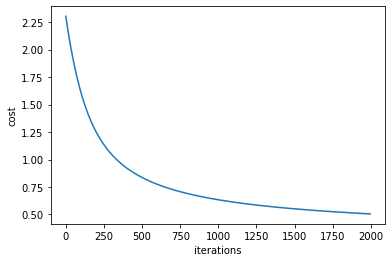

In [20]:
res_W, res_b, costs = model(X, Y_hot, C, alpha=0.009, iterations=2000)

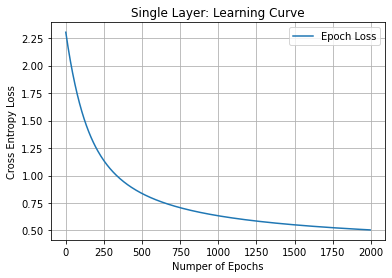

In [40]:
plt.plot(np.arange(0,iterations,5), np.array(costs).reshape(len(costs),1), label="Epoch Loss")
plt.grid()
plt.title("Single Layer: Learning Curve")
plt.legend()
plt.xlabel("Numper of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.savefig("SingleCost.jpeg")
plt.show()

In [31]:
predicted_labels = predict(X, Y_hot, res_W, res_b)

Accuracy : 93.98342323865816
Cost : [[0.50490669]]


In [32]:
print(f'{np.sum(predicted_labels==train_labels)} images correctly labeled out of {train_labels.shape[0]} for Train Set')

52507 images correctly labeled out of 60000 for Train Set


In [33]:
predicted_labels = predict(X_test, Y_test_hot, res_W, res_b)

Accuracy : 94.18144087022407
Cost : [[0.08025342]]


In [34]:
print(f'{np.sum(predicted_labels==test_labels)} images correctly labeled out of {test_labels.shape[0]} for Test Set')

8836 images correctly labeled out of 10000 for Test Set


The image no. is 7 and my Model predicts 2


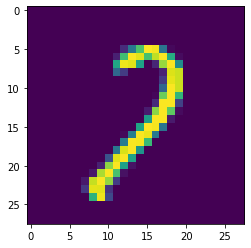

In [41]:
image = 5246   # 0-9999
plt.imshow(test_images[image])
print(f'The image no. is {test_labels[image]} and my Model predicts {predicted_labels[image]}')

In [42]:
pd.DataFrame([cost[0][0] for cost in costs], columns=['Cost'], index=np.arange(0,iterations,5)).to_csv('Cost.csv')
pd.DataFrame(res_W).to_csv('res_W.csv', header=None,index=None)
pd.DataFrame(res_b).to_csv('res_b.csv', header=None,index=None)

In [22]:
res_W = pd.read_csv('res_W.csv', header=None, index_col=None).to_numpy()
res_W.shape

(784, 10)

In [23]:
res_b = pd.read_csv('res_b.csv', header=None, index_col=None).to_numpy()
res_b.shape

(10, 1)